<a href="https://colab.research.google.com/github/rizkyfauziilmi/TUGAS_UAS_ML/blob/main/test_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [352]:
import kagglehub

path_df = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

In [353]:
import pandas as pd

df = pd.read_csv(path_df + "/Mall_Customers.csv")

In [354]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Cleaning

In [356]:
import re

def column_names(data: pd.DataFrame) -> pd.DataFrame:
    cleaned_columns = []
    for col in data.columns:
        col = re.sub(r'\([^)]*\)', '', col)  # Hilangkan isi dalam tanda kurung dan tanda kurungnya
        col = re.sub(r'\s+', '', col)  # Hilangkan semua spasi
        col = re.sub(r'[^a-zA-Z]', '', col)  # Hilangkan karakter selain huruf
        cleaned_columns.append(col)

    data.columns = cleaned_columns
    return data


In [357]:
df = column_names(df)

df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [358]:
df.duplicated().sum()

np.int64(0)

In [359]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


In [360]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [361]:
def describe_categorical_columns(df: pd.DataFrame) -> None:
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("Tidak ada kolom kategorikal dalam DataFrame.")
        return

    for col in categorical_cols:
        print(f"\nKolom: {col}")
        print(df[col].value_counts(dropna=False))  # Termasuk NaN jika ada


In [362]:
describe_categorical_columns(df)


Kolom: Gender
Gender
Female    112
Male       88
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

- Select Features

In [363]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [364]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# CustomerID tidak termasuk analisis
numerical_cols = numerical_cols.drop("CustomerID")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['Age', 'AnnualIncome', 'SpendingScore'], dtype='object')
Categorical Columns: Index(['Gender'], dtype='object')


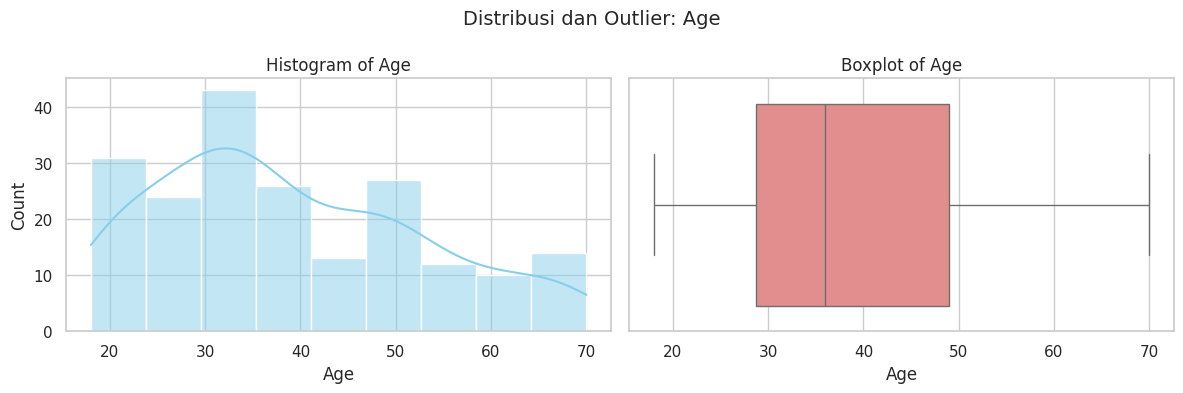

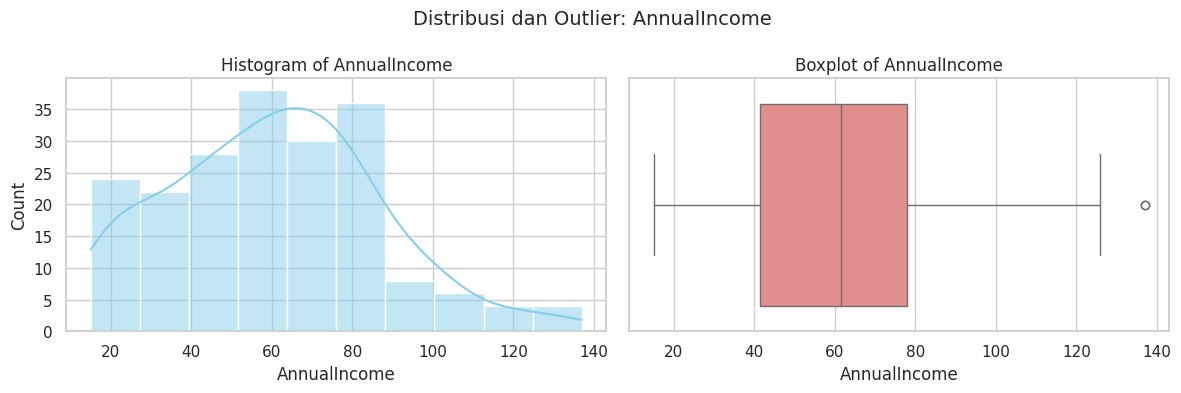

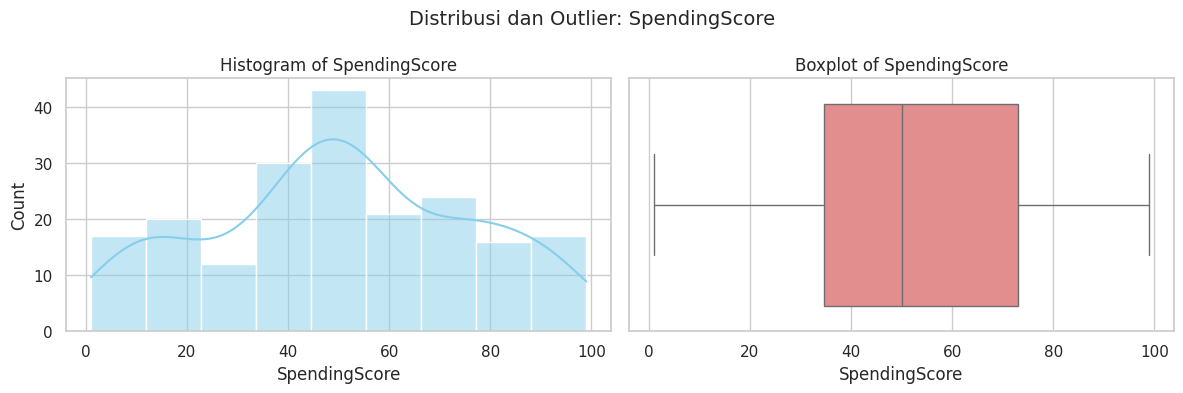

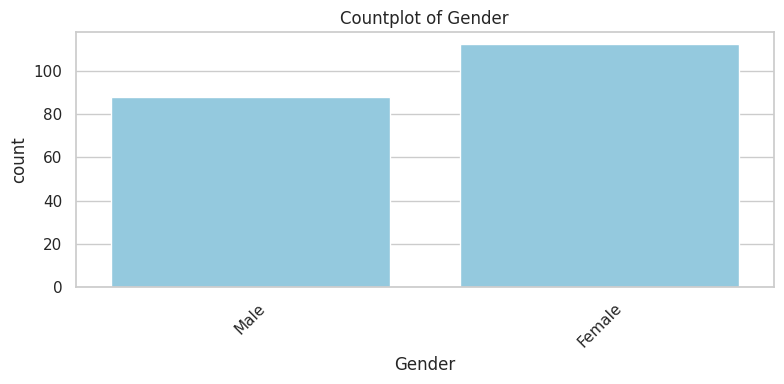

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# --- Plot untuk kolom numerik ---
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Distribusi dan Outlier: {col}", fontsize=14)

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="lightcoral")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# --- Plot untuk kolom kategorikal ---
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, color="skyblue")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Feature Selection & Scaling

In [366]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')